In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
!pip install Leaflet

In [5]:
!pip install scikit-learn

In [6]:
!pip install geopandas

In [7]:
!pip install geodatasets

In [8]:
!pip install mlxtend

In [9]:
!pip install --upgrade geopandas

In [11]:
!pip install shap

In [12]:
!pip install ipywidgets --upgrade

In [13]:
!pip uninstall numpy -y

Found existing installation: numpy 2.0.0
Uninstalling numpy-2.0.0:
  Successfully uninstalled numpy-2.0.0


In [14]:
!pip install numpy==2.0.0

  Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [15]:
!pip install --upgrade shap

         ID Case Number                    Date                Block  IUCR  \
0  13638907    JH478027  10/22/2024 12:00:00 AM      017XX E 67TH ST  1365   
1  13639638    JH479022  10/22/2024 12:00:00 AM    015XX S THROOP ST  1320   
2  13639100    JH478550  10/22/2024 12:00:00 AM  041XX W OAKDALE AVE  1153   
3  13639174    JH478505  10/22/2024 12:00:00 AM     023XX W 111TH ST  0430   
4  13644109    JH484519  10/22/2024 12:00:00 AM      001XX E OHIO ST  0281   

              Primary Type                          Description  \
0        CRIMINAL TRESPASS                         TO RESIDENCE   
1          CRIMINAL DAMAGE                           TO VEHICLE   
2       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
3                  BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
4  CRIMINAL SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True     False  ...  

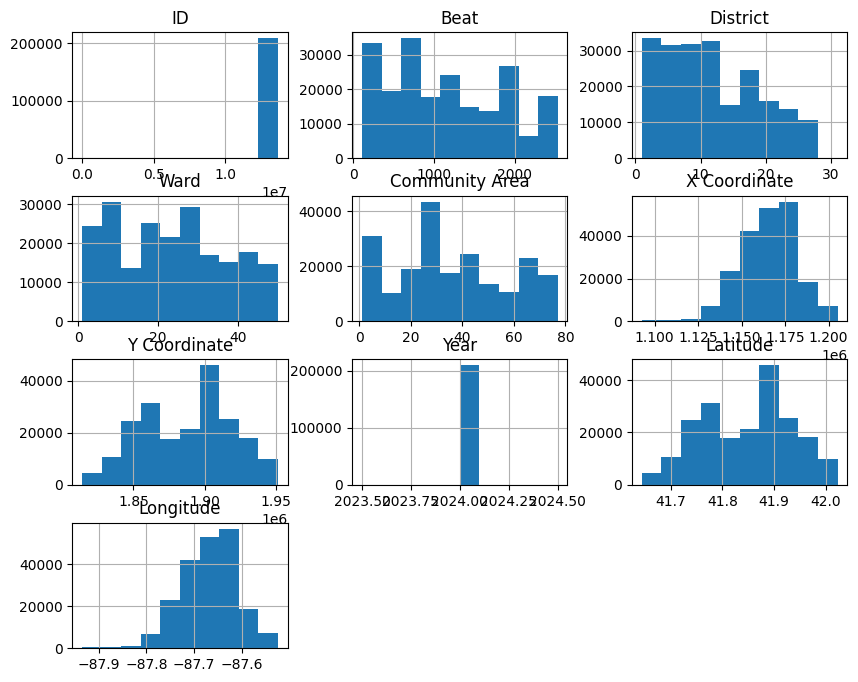

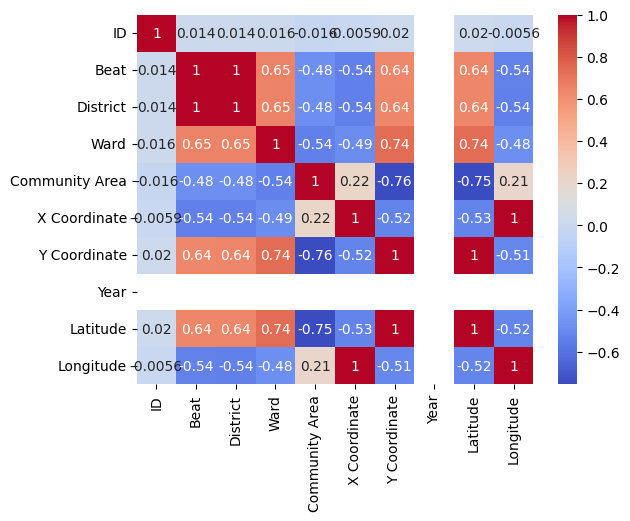

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')
# Mostrar las primeras filas de los datos
print(data.head())

# Descripción estadística de los datos numéricos
print(data.describe())

# Distribución de características categóricas
categorical_columns = ['Primary Type', 'Description', 'Location']
for col in categorical_columns:
    print(f"Distribución de {col}:")
    print(data[col].value_counts())

# Histograma de las características numéricas
data.hist(figsize=(10, 8))
plt.show()

# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Mapa de calor de la correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

# Convertir características categóricas a numéricas
label_encoders = {}
categorical_columns = ['Primary Type', 'Description', 'Location Description']
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

# Identificar las columnas categóricas restantes en X y codificarlas
remaining_categorical_columns = X.select_dtypes(include=['object']).columns
for col in remaining_categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Escalar características numéricas
scaler = StandardScaler()  # Inicializar el scaler
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2, random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic, test_size=0.2, random_state=42)


In [3]:
print(X.info())  # Verificar el tipo de datos
print(X.head())  # Ver los primeros registros


<class 'pandas.core.frame.DataFrame'>
Index: 208673 entries, 0 to 209571
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    208673 non-null  int64  
 1   Case Number           208673 non-null  int64  
 2   Date                  208673 non-null  int64  
 3   Block                 208673 non-null  int64  
 4   IUCR                  208673 non-null  int64  
 5   Primary Type          208673 non-null  int64  
 6   Description           208673 non-null  int64  
 7   Location Description  208673 non-null  int64  
 8   Beat                  208673 non-null  int64  
 9   District              208673 non-null  int64  
 10  Ward                  208673 non-null  int64  
 11  Community Area        208673 non-null  int64  
 12  FBI Code              208673 non-null  int64  
 13  X Coordinate          208673 non-null  float64
 14  Y Coordinate          208673 non-null  float64
 15  Year 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Entrenar un modelo de clasificación de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_arrest_train)
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)
# Informar de clasificación
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95     36142
        True       0.81      0.49      0.61      5593

    accuracy                           0.92     41735
   macro avg       0.87      0.74      0.78     41735
weighted avg       0.91      0.92      0.91     41735



In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Entrenar un modelo de regresión de Random Forest
reg_latitude = RandomForestRegressor(random_state=42)
reg_longitude = RandomForestRegressor(random_state=42)
# Separar el objetivo de regresión
y_latitude = data_cleaned['Latitude']
y_longitude = data_cleaned['Longitude']
# Dividir los datos
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_scaled, y_latitude, test_size=0.2, random_state=42)
X_train_long, X_test_long, y_train_long, y_test_long = train_test_split(X_scaled, y_longitude, test_size=0.2, random_state=42)
# Entrenar modelos
reg_latitude.fit(X_train_lat, y_train_lat)
reg_longitude.fit(X_train_long, y_train_long)
# Predecir y evaluar los modelos
y_pred_lat = reg_latitude.predict(X_test_lat)
y_pred_long = reg_longitude.predict(X_test_long)
print("MAE Latitud:", mean_absolute_error(y_test_lat, y_pred_lat))
print("MSE Latitud:", mean_squared_error(y_test_lat, y_pred_lat))
print("MAE Longitud:", mean_absolute_error(y_test_long, y_pred_long))
print("MSE Longitud:", mean_squared_error(y_test_long, y_pred_long))


KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna de fecha a tipo datetime con el formato específico
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Agrupar datos por fecha y contar ocurrencias
time_series = data.groupby(data['Date'].dt.date).size()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title("Ocurrencias a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de ocurrencias")
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar tus datos desde un archivo CSV
data = pd.read_csv('/home/jovyan/work/Crimes_-_2024_20241031.csv')  # Asegúrate de que la ruta sea correcta

# Crear un GeoDataFrame a partir de los datos
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Cargar el mapa del mundo
world = gpd.read_file('/home/jovyan/work/ne_110m_admin_0_countries.shp')


# Crear el gráfico
ax = world.boundary.plot(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Ocurrencias geográficas")
plt.show()

In [11]:
from sklearn.ensemble import IsolationForest
# Entrenar un modelo de Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)
# Predecir anomalías en el conjunto de prueba
y_pred_anomaly = iso_forest.predict(X_test)
# Contar el número de anomalías
num_anomalies = sum(y_pred_anomaly == -1)
print(f"Número de anomalías: {num_anomalies}")

Número de anomalías: 16741


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules
# Convertir los datos categóricos a formato de conjuntos
categorical_columns = ['Primary Type', 'Description', 'Location Description']
data_categorical = data[categorical_columns]
data_categorical_one_hot = pd.get_dummies(data_categorical)
# Aplicar el algoritmo de Apriori
frequent_itemsets = apriori(data_categorical_one_hot, min_support=0.05, use_colnames=True)
# Extraer reglas de asociación
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules)

                              antecedents  \
0                  (Primary Type_ASSAULT)   
1                    (Description_SIMPLE)   
2                  (Primary Type_BATTERY)   
3   (Description_DOMESTIC BATTERY SIMPLE)   
4                  (Primary Type_BATTERY)   
5                    (Description_SIMPLE)   
6        (Location Description_APARTMENT)   
7                  (Primary Type_BATTERY)   
8                (Description_TO VEHICLE)   
9          (Primary Type_CRIMINAL DAMAGE)   
10     (Primary Type_MOTOR VEHICLE THEFT)   
11               (Description_AUTOMOBILE)   
12     (Primary Type_MOTOR VEHICLE THEFT)   
13          (Location Description_STREET)   
14                   (Primary Type_THEFT)   
15           (Description_$500 AND UNDER)   
16                   (Primary Type_THEFT)   
17                (Description_OVER $500)   
18                   (Primary Type_THEFT)   
19             (Description_RETAIL THEFT)   

                              consequents  antecedent 

In [ ]:
import shap
# Entrenar el modelo (usando Random Forest como ejemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_arrest_train)
# Calcular valores SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
# Visualizar la importancia de las características
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

In [11]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('Crimes_-_2024_20241031.csv')

# Selección de variables categóricas relevantes
categorical_columns = ['Primary Type', 'Location Description']  # Ajusta las columnas relevantes
numerical_columns = ['some_numeric_column']  # Ajusta según las columnas numéricas disponibles
selected_columns = categorical_columns + numerical_columns

# Filtrar las columnas seleccionadas
data = data[selected_columns]

# Codificación de frecuencia para las columnas categóricas
for col in categorical_columns:
    data[col] = data[col].map(data[col].value_counts())

# Dividir los datos en características y etiquetas
X = data.drop(columns=['Primary Type'])
y = data['Primary Type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Tomar una muestra de 5,000 registros para reducir el tiempo de cómputo de SHAP
X_sample = X_test.sample(n=5000, random_state=42)

# Entrenar el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calcular valores SHAP usando una muestra de datos
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_sample)

# Visualizar la importancia de las características
shap.summary_plot(shap_values[1], X_sample, plot_type='bar')


KeyError: "['some_numeric_column'] not in index"

In [12]:
print(data.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [15]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB ? eta 0:00:00 0:00:0100:38
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 440.4 kB/s eta 0:00:0000:0100:14
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 686.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 711.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 894.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 650.3 kB/s eta 0:00:000:01m00:30
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 886.2 kB/s eta 0:00:000:01m0:05m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 758.8 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 671.9 kB/s eta 0:00:0000:0100:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 626.0 kB/s eta 0:00:0000:0100:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 602.4 kB/s eta 0:00:0000:0100:07
   ━━━━

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
# Definir la red neuronal
class Net(nn.Module):
def __init__(self):
super(Net, self).__init__()
self.fc1 = nn.Linear(X_train.shape[1], 64)
self.fc2 = nn.Linear(64, 1)
def forward(self, x):
x = torch.relu(self.fc1(x))
x = torch.sigmoid(self.fc2(x))
return x
# Convertir los datos a tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_domestic_train_torch = torch.tensor(y_domestic_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_domestic_test_torch = torch.tensor(y_domestic_test.values, dtype=torch.float32)
# Crear la red y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
# Entrenar la red neuronal
num_epochs = 100
for epoch in range(num_epochs):
net.train()
optimizer.zero_grad()
outputs = net(X_train_torch)
loss = criterion(outputs, y_domestic_train_torch.view(-1, 1))
loss.backward()
optimizer.step()
if epoch % 10 == 0:
print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
# Evaluar la red neuronal
net.eval()
with torch.no_grad():
outputs_test = net(X_test_torch)
outputs_test = outputs_test.view(-1).round()
accuracy = (outputs_test == y_domestic_test_torch).float().mean()
print(f"Accuracy: {accuracy.item()}")

IndentationError: expected an indented block after class definition on line 6 (1041914878.py, line 7)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Modelos de clasificación
models = {
'Random Forest': RandomForestClassifier(random_state=42),
'SVM': SVC(),
'Logistic Regression': LogisticRegression(random_state=42)
}
# Entrenar y evaluar los modelos
for model_name, model in models.items():
model.fit(X_train, y_arrest_train)
y_pred = model.predict(X_test)
print(f"--- {model_name} ---")
print(classification_report(y_arrest_test, y_pred))

IndentationError: expected an indented block after 'for' statement on line 12 (4062496757.py, line 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Modelos de clasificación
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Entrenar y evaluar los modelos
for model_name, model in models.items():
    model.fit(X_train, y_arrest_train)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_arrest_test, y_pred))


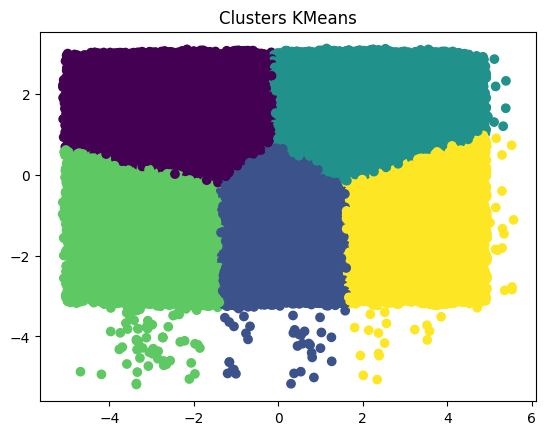

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Clustering con KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters KMeans')
plt.show()

In [5]:
!pip install KMeans

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-311
      creating build/lib.linux-x86_64-cpython-311/kmeans
      copying kmeans/performance.py -> build/lib.linux-x86_64-cpython-311/kmeans
      copying kmeans/__init__.py -> build/lib.linux-x86_64-cpython-311/kmeans
      copying kmeans/tests.py -> build/lib.linux-x86_64-cpython-311/kmeans
      running egg_info
      writing kmeans.egg-info/PKG-INFO
      writing dependency_links to kmeans.egg-info/dependency_links.txt
      writing top-level names to kmeans.egg-info/top_level.txt
      reading manifest file 'kmeans.egg-info/SOURCES.txt'
      writing manifest file 'kmeans.egg-info/SOURCES.txt'
      copying kmeans/lib.c ->

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular matriz de correlación
corr_matrix = data.corr()
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

ValueError: could not convert string to float: 'JH478027'

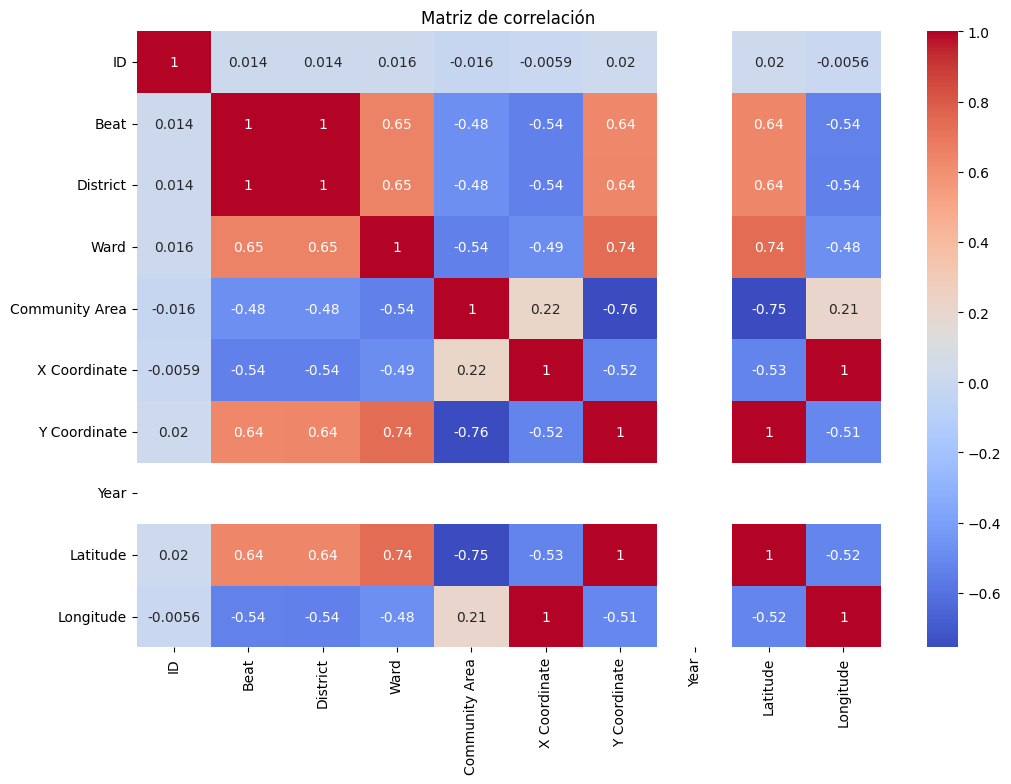

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
data_numeric = data.select_dtypes(include=[float, int])

# Calcular matriz de correlación
corr_matrix = data_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [14]:
from imblearn.over_sampling import SMOTE
# Manejar el desequilibrio de datos en 'ARREST'
smote = SMOTE(random_state=42)
X_resampled, y_arrest_resampled = smote.fit_resample(X_train, y_arrest_train)
# Entrenar un modelo de clasificación de Random Forest con datos reequilibrados
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_arrest_resampled)
# Evaluar el modelo
y_pred = clf.predict(X_test)
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94     36142
        True       0.66      0.56      0.61      5593

    accuracy                           0.90     41735
   macro avg       0.80      0.76      0.78     41735
weighted avg       0.90      0.90      0.90     41735



In [13]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 507.5 kB/s eta 0:00:000:01:00:01


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Entrenar un modelo de árbol de decisión
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_arrest_train)
# Entrenar un modelo de bosque aleatorio
rforest = RandomForestClassifier(random_state=42)
rforest.fit(X_train, y_arrest_train)
# Evaluar el árbol de decisión
y_pred_tree = dtree.predict(X_test)
print("Clasificación con Árbol de Decisión:")
print(classification_report(y_arrest_test, y_pred_tree))
# Evaluar el bosque aleatorio
y_pred_forest = rforest.predict(X_test)
print("Clasificación con Bosque Aleatorio:")
print(classification_report(y_arrest_test, y_pred_forest))

Clasificación con Árbol de Decisión:
              precision    recall  f1-score   support

       False       0.93      0.92      0.93     36142
        True       0.52      0.54      0.53      5593

    accuracy                           0.87     41735
   macro avg       0.73      0.73      0.73     41735
weighted avg       0.87      0.87      0.87     41735

Clasificación con Bosque Aleatorio:
              precision    recall  f1-score   support

       False       0.93      0.98      0.95     36142
        True       0.81      0.49      0.61      5593

    accuracy                           0.92     41735
   macro avg       0.87      0.74      0.78     41735
weighted avg       0.91      0.92      0.91     41735



In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])
# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)
# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)
# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [209572, 208673]

ValueError: 'c' argument has 209572 elements, which is inconsistent with 'x' and 'y' with size 208673.

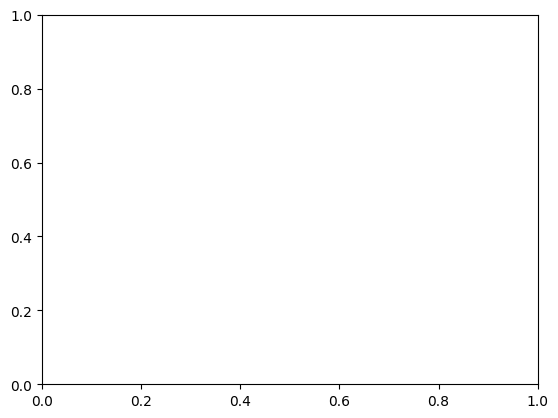

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [24]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
app = Flask(__name__)
# Cargar el modelo entrenado y otros recursos
model = joblib.load('model_arrest.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')
@app.route('/predict', methods=['POST'])
def predict():
# Obtener los datos de entrada en formato JSON
data = request.get_json()
# Convertir a DataFrame
df = pd.DataFrame([data])
# Preprocesar los datos
df = preprocess_data(df, scaler, label_encoders)
# Hacer predicción
prediction = model.predict(df)
# Devolver la predicción como JSON
return jsonify({'prediction': prediction[0]})
def preprocess_data(df, scaler, label_encoders):
# Convertir características categóricas a numéricas
for col, le in label_encoders.items():
df[col] = le.transform(df[col])
# Escalar características numéricas
df_scaled = scaler.transform(df)
return df_scaled
if __name__ == '__main__':
app.run()

IndentationError: expected an indented block after function definition on line 12 (843481220.py, line 14)

In [27]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

app = Flask(__name__)

# Cargar el modelo entrenado y otros recursos
model = joblib.load('model_arrest.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Obtener los datos de entrada en formato JSON
    data = request.get_json()
    
    # Convertir a DataFrame
    df = pd.DataFrame([data])
    
    # Preprocesar los datos
    df = preprocess_data(df, scaler, label_encoders)
    
    # Hacer predicción
    prediction = model.predict(df)
    
    # Devolver la predicción como JSON
    return jsonify({'prediction': prediction[0]})

def preprocess_data(df, scaler, label_encoders):
    # Convertir características categóricas a numéricas
    for col, le in label_encoders.items():
        df[col] = le.transform(df[col])
        
    # Escalar características numéricas
    df_scaled = scaler.transform(df)
    return df_scaled

if __name__ == '__main__':
    app.run()


FileNotFoundError: [Errno 2] No such file or directory: 'model_arrest.pkl'

In [26]:
!pip install flask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 705.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 997.8 kB/s eta 0:00:00 0:00:01


In [28]:
joblib.dump(model, 'model_arrest.pkl')


NameError: name 'model' is not defined

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Definir el modelo
clf = RandomForestClassifier(random_state=42)
# Definir los hiperparámetros a optimizar
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10]
}
# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_arrest_train)
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)
# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))


KeyboardInterrupt



In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asegurarse de que 'Arrest' no tenga valores nulos y los índices coincidan
data_filtered = data.dropna(subset=['Arrest'])
X_scaled = X_scaled[data_filtered.index]  # Filtrar X_scaled para que coincida en tamaño con data_filtered

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos reducidos
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=data_filtered['Arrest'].apply(lambda x: 0 if x == 'N' else 1), 
    cmap='coolwarm'
)
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


IndexError: index 208673 is out of bounds for axis 0 with size 208673

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combinar X_scaled con data en un DataFrame temporal
df_combined = pd.DataFrame(X_scaled)
df_combined['Arrest'] = data['Arrest'].values

# Eliminar filas con valores nulos en 'Arrest'
df_combined.dropna(subset=['Arrest'], inplace=True)

# Extraer nuevamente X_scaled y la columna 'Arrest'
X_scaled_filtered = df_combined.drop(columns=['Arrest']).values
arrest_labels = df_combined['Arrest'].apply(lambda x: 0 if x == 'N' else 1).values

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=arrest_labels, cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


ValueError: Length of values (209572) does not match length of index (208673)

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filtrar filas nulas en data['Arrest'] y alinear X
data_filtered = data.dropna(subset=['Arrest'])
X_filtered = X[data_filtered.index]

# Escalar los datos filtrados
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)

# Crear etiquetas para los colores
arrest_labels = data_filtered['Arrest'].apply(lambda x: 0 if x == 'N' else 1).values

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=arrest_labels, cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


KeyError: 'None of [RangeIndex(start=0, stop=209572, step=1)] are in the [columns]'

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que X sea un DataFrame
X_df = pd.DataFrame(X)

# Filtrar filas nulas en 'data' y alinear X
data_filtered = data.dropna(subset=['Arrest'])
X_filtered = X_df.loc[data_filtered.index]

# Escalar los datos filtrados
scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)

# Crear etiquetas para los colores
arrest_labels = data_filtered['Arrest'].apply(lambda x: 0 if x == 'N' else 1).values

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_filtered)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=arrest_labels, cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


KeyError: '[175, 197, 256, 300, 324, 358, 367, 429, 464, 573, 634, 734, 1224, 1244, 1401, 1408, 1701, 1767, 1890, 1929, 2103, 2358, 2513, 2586, 2619, 2740, 2822, 3180, 3183, 3280, 3425, 3426, 3745, 3746, 3935, 4046, 4181, 4344, 4407, 4438, 4751, 5207, 6950, 6978, 7047, 7289, 7426, 7492, 7607, 7681, 7819, 8263, 8630, 8637, 8717, 8802, 9030, 9553, 9596, 9757, 9851, 9995, 10452, 10703, 10869, 11104, 12669, 12924, 13322, 13436, 13679, 13972, 14034, 14250, 14685, 14756, 14757, 15046, 15052, 15187, 15375, 15577, 16552, 17081, 17097, 17206, 17243, 17913, 18438, 18553, 19104, 19768, 19889, 20022, 20076, 20107, 22004, 22029, 23144, 23528, 23569, 24314, 24852, 25263, 25533, 25689, 25849, 26268, 26430, 26604, 26805, 27120, 28013, 28090, 28183, 28314, 28865, 28935, 29442, 29510, 30120, 30124, 30164, 30267, 30329, 30828, 31764, 33254, 33382, 33718, 34274, 34380, 34450, 34510, 34739, 34908, 35023, 36719, 38006, 38270, 38591, 38656, 39043, 39044, 39216, 39234, 39398, 39449, 40004, 40079, 40256, 40650, 40804, 40941, 40974, 41566, 42149, 42314, 42325, 42397, 42815, 43027, 43057, 43175, 43641, 43681, 43998, 44208, 44251, 44259, 44425, 44452, 44464, 44678, 45039, 45218, 45691, 46158, 46380, 46739, 46818, 47076, 47328, 47392, 48038, 48074, 48281, 48468, 48572, 48757, 49126, 49153, 49343, 49384, 49426, 49538, 49799, 50009, 50091, 51964, 52115, 52587, 52775, 52817, 52908, 52959, 52972, 53008, 53623, 53706, 54838, 54901, 55322, 55572, 55647, 55714, 55861, 55874, 56405, 56440, 56466, 57466, 57484, 57525, 58032, 58148, 58200, 58820, 58923, 59155, 59192, 59215, 59621, 59682, 59704, 59910, 59938, 60347, 60424, 60518, 60588, 61138, 61333, 61580, 62684, 62875, 63414, 63622, 63776, 64590, 65012, 65155, 65870, 66122, 66661, 67054, 67200, 68106, 68318, 68323, 68735, 68920, 68936, 68937, 68976, 69017, 69138, 69318, 69873, 70661, 71204, 71843, 71891, 72142, 72298, 72322, 72654, 73314, 73407, 73479, 74109, 74156, 74363, 75040, 75118, 75193, 75578, 75884, 76114, 76135, 76206, 76207, 76248, 76353, 76369, 76371, 76388, 76408, 76615, 76709, 76938, 77328, 77538, 77921, 78304, 78772, 79257, 79508, 79698, 80430, 81206, 81354, 82063, 82116, 82148, 82194, 82621, 82832, 82878, 82973, 83222, 83570, 83669, 84241, 84437, 85074, 85127, 85446, 85753, 85910, 85963, 86163, 86427, 86549, 87113, 87269, 87436, 87452, 88199, 88226, 88227, 88232, 88435, 88711, 88979, 89184, 89644, 89765, 90549, 91206, 91813, 91943, 92492, 92598, 92732, 92748, 92860, 92892, 93587, 93808, 95144, 95245, 95899, 96172, 96614, 96618, 96739, 97368, 97413, 97488, 97948, 97963, 97980, 98174, 98217, 98240, 98625, 98699, 98923, 98968, 99061, 99420, 99531, 99722, 99998, 100122, 100247, 100338, 100515, 101186, 101194, 101207, 101237, 101300, 101910, 102453, 102893, 103299, 103363, 103462, 103566, 103602, 104270, 104304, 104309, 104400, 104417, 104942, 105056, 105109, 105374, 105421, 105595, 105662, 105702, 105772, 105867, 105969, 105981, 106101, 106121, 106205, 106322, 106366, 106821, 106837, 107256, 107800, 107917, 107938, 108219, 108320, 108782, 109685, 109781, 110639, 111320, 111598, 112050, 112055, 112085, 112089, 112134, 112401, 112574, 112658, 112689, 112782, 112879, 113243, 113355, 113376, 113403, 113474, 113592, 114141, 114216, 114265, 114284, 114363, 115035, 115082, 115138, 115221, 115492, 117209, 117406, 117789, 117850, 118491, 118514, 118547, 118673, 118719, 119243, 119481, 119521, 119815, 120061, 120233, 121783, 121974, 122147, 122285, 122403, 123057, 123113, 123531, 123628, 123712, 123734, 123811, 124203, 124402, 124409, 124586, 124604, 124687, 124930, 125060, 125130, 125365, 126483, 127051, 127093, 127324, 127704, 127815, 127871, 127904, 127909, 128033, 128198, 128248, 128507, 128508, 128509, 128616, 128722, 128816, 128986, 129216, 129396, 129405, 129471, 130190, 131426, 131635, 132446, 133402, 133544, 134080, 134108, 134176, 134260, 134861, 134876, 135028, 135047, 135050, 135662, 136259, 136743, 137162, 137238, 137828, 138075, 138268, 138368, 138395, 138424, 139003, 139417, 139620, 139769, 139793, 139910, 141099, 141202, 141737, 141950, 142525, 142554, 142566, 143009, 143376, 143706, 143834, 143902, 144257, 144439, 144495, 144628, 144634, 144830, 145083, 145088, 145340, 146446, 147197, 147215, 147325, 147572, 147768, 147961, 148467, 148468, 148712, 148738, 148911, 149004, 149009, 149023, 149077, 149097, 149102, 149210, 149399, 150306, 150416, 150430, 150492, 150688, 150890, 151282, 151615, 152402, 152820, 152933, 153297, 153500, 153544, 153624, 154126, 154346, 154774, 155058, 155128, 155370, 155386, 155546, 156429, 156624, 156679, 156866, 156999, 157016, 157090, 157129, 157398, 157577, 157639, 158065, 158264, 158927, 158994, 159189, 159409, 160234, 160257, 161257, 161297, 161368, 162227, 162323, 162364, 162368, 162382, 162421, 162498, 162807, 163265, 163487, 163921, 164044, 164416, 165031, 165123, 165252, 165681, 165834, 165930, 165939, 166425, 166506, 166607, 166943, 167774, 167963, 168429, 168765, 168847, 169259, 169475, 170132, 170149, 170180, 170351, 170390, 170394, 170413, 170640, 171024, 171070, 171139, 171344, 171524, 171822, 171865, 172004, 172287, 172358, 172492, 172502, 172653, 174052, 174282, 174584, 174625, 174755, 174773, 174792, 175339, 176070, 176146, 176175, 176181, 176196, 176476, 176634, 176667, 176729, 176744, 176768, 177395, 177508, 177524, 177779, 179205, 179213, 179421, 179698, 179768, 180019, 180076, 180604, 180622, 180704, 180934, 181393, 181409, 181458, 181856, 181921, 181945, 182023, 182052, 182056, 182189, 182245, 182366, 182582, 182589, 182648, 182784, 182800, 182842, 183089, 183345, 183470, 184016, 184556, 184815, 184886, 185067, 185088, 185470, 185648, 185651, 185947, 186548, 186701, 186736, 186862, 186936, 186946, 187074, 187081, 187263, 187468, 187491, 187638, 187730, 187740, 187778, 187893, 188125, 188708, 188734, 188836, 188851, 188991, 189072, 189100, 189127, 189411, 189555, 189773, 189854, 189860, 190087, 190363, 190470, 190526, 191493, 191562, 191595, 191947, 191965, 192264, 193191, 193256, 193329, 193469, 193561, 194007, 194041, 194051, 194057, 194518, 194717, 194804, 195204, 195809, 195894, 195919, 195940, 195943, 196539, 196553, 196637, 196763, 197396, 197708, 197751, 197893, 198076, 198178, 198219, 198354, 198375, 198419, 198705, 198740, 199243, 199246, 199422, 199543, 199790, 199977, 200002, 200018, 200025, 200057, 200087, 200309, 200340, 200473, 200501, 200624, 200907, 200928, 201316, 201343, 201808, 201913, 201958, 202071, 202387, 202621, 202637, 202658, 202660, 202962, 203106, 203169, 203228, 203308, 203735, 203748, 203892, 203950, 204861, 205699, 206066, 206221, 206339, 206367, 206402, 206571, 206671, 207047, 207643, 207687, 207688, 207705, 207726, 207738, 207763, 207772, 207777, 207814, 207850, 207983, 208440, 208788, 208962, 209018, 209088] not in index'

         ID Case Number                    Date                Block  IUCR  \
0  13638907    JH478027  10/22/2024 12:00:00 AM      017XX E 67TH ST  1365   
1  13639638    JH479022  10/22/2024 12:00:00 AM    015XX S THROOP ST  1320   
2  13639100    JH478550  10/22/2024 12:00:00 AM  041XX W OAKDALE AVE  1153   
3  13639174    JH478505  10/22/2024 12:00:00 AM     023XX W 111TH ST  0430   
4  13644109    JH484519  10/22/2024 12:00:00 AM      001XX E OHIO ST  0281   

              Primary Type                          Description  \
0        CRIMINAL TRESPASS                         TO RESIDENCE   
1          CRIMINAL DAMAGE                           TO VEHICLE   
2       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
3                  BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
4  CRIMINAL SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True     False  ...  

  0%|          | 0/1000 [00:00<?, ?it/s]

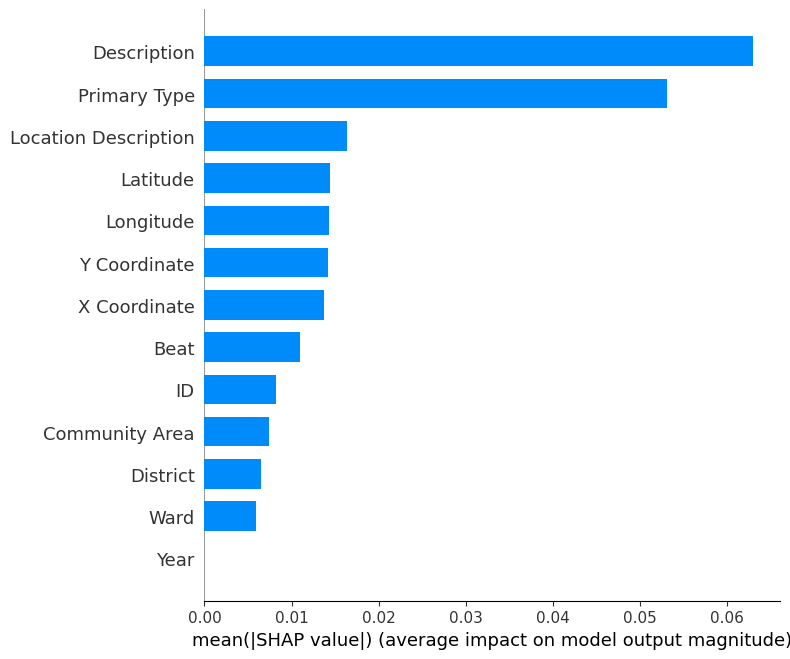

In [37]:
import pandas as pd
data = pd.read_csv('Crimes_-_2024_20241031.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

data['Location Description'] = data['Location Description'].fillna('Unknown')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

print(data.head())  # Verifica las primeras filas del DataFrame original

# Convertir características categóricas a numéricas
categorical_columns = ['Primary Type', 'Description', 'Location Description']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic', 'Case Number', 'Domestic', 'Date', 'Block', 'Updated On', 'Location', 'IUCR', 'FBI Code'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2,
random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic,
test_size=0.2, random_state=42)

print(X_scaled[:5])

#Aqui empieza la 9

!pip install numpy
!pip install numba
!pip install shap

import numpy
import numba
import shap

print(numpy.__version__)
print(numba.__version__)
print(shap.__version__)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=10, random_state=42) 
# Usar solo 10 árboles
clf.fit(X_train, y_arrest_train)

# Calcular valores SHAP usando KernelExplainer para rapidez
explainer = shap.KernelExplainer(clf.predict, X_train[:100])  
# Usar solo una muestra pequeña para inicializar
X_test_df = pd.DataFrame(X_test, columns=X.columns) 
# Mantener los nombres originales de las columnas
X_test_sample = X_test_df.sample(n=1000, random_state=42) 
# Toma una muestra de 1000 filas para acelerar el proceso

shap_values = explainer.shap_values(X_test_sample)

# Visualizar la importancia de las características
shap.summary_plot(shap_values, X_test_sample, plot_type='bar')


In [40]:


#aqui empieza la 10

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
# Definir la red neuronal
class Net(nn.Module):
def __init__(self):
super(Net, self).__init__()
self.fc1 = nn.Linear(X_train.shape[1], 64)
self.fc2 = nn.Linear(64, 1)
def forward(self, x):
x = torch.relu(self.fc1(x))
x = torch.sigmoid(self.fc2(x))
return x
# Convertir los datos a tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_domestic_train_torch = torch.tensor(y_domestic_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_domestic_test_torch = torch.tensor(y_domestic_test.values, dtype=torch.float32)
# Crear la red y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
# Entrenar la red neuronal
num_epochs = 100
for epoch in range(num_epochs):
net.train()
optimizer.zero_grad()
outputs = net(X_train_torch)
loss = criterion(outputs, y_domestic_train_torch.view(-1, 1))
loss.backward()
optimizer.step()
if epoch % 10 == 0:
print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
# Evaluar la red neuronal
net.eval()
with torch.no_grad():
outputs_test = net(X_test_torch)
outputs_test = outputs_test.view(-1).round()
accuracy = (outputs_test == y_domestic_test_torch).float().mean()
print(f"Accuracy: {accuracy.item()}")

IndentationError: expected an indented block after class definition on line 8 (2720369760.py, line 9)

In [43]:
import pandas as pd
data = pd.read_csv('Crimes_-_2024_20241031.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

data['Location Description'] = data['Location Description'].fillna('Unknown')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

print(data.head())  # Verifica las primeras filas del DataFrame original

# Convertir características categóricas a numéricas
categorical_columns = ['Primary Type', 'Description', 'Location Description']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic', 'Case Number', 'Domestic', 'Date', 'Block', 'Updated On', 'Location', 'IUCR', 'FBI Code'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2,
random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic,
test_size=0.2, random_state=42)

print(X_scaled[:5])

#aqui empieza la 11

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Modelos de clasificación
models = {
'Random Forest': RandomForestClassifier(random_state=42),
'SVM': SVC(),
'Logistic Regression': LogisticRegression(random_state=42)
}
# Entrenar y evaluar los modelos
for model_name, model in models.items():
model.fit(X_train, y_arrest_train)
y_pred = model.predict(X_test)
print(f"--- {model_name} ---")
print(classification_report(y_arrest_test, y_pred))

IndentationError: expected an indented block after 'for' statement on line 54 (3838009952.py, line 55)

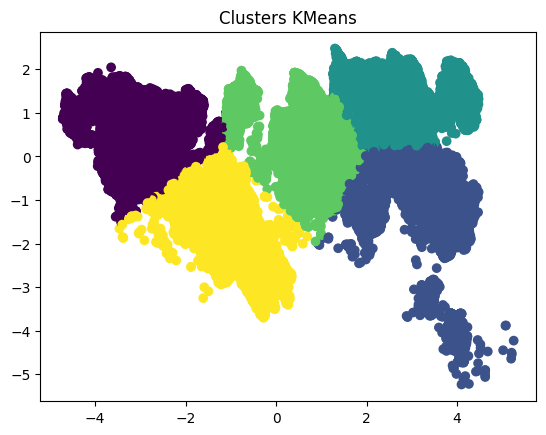

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Clustering con KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters KMeans')
plt.show()

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
# Definir la red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
# Convertir los datos a tensores
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_domestic_train_torch = torch.tensor(y_domestic_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_domestic_test_torch = torch.tensor(y_domestic_test.values, dtype=torch.float32)
# Crear la red y definir la función de pérdida y el optimizador
net = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
# Entrenar la red neuronal
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_torch)
    loss = criterion(outputs, y_domestic_train_torch.view(-1, 1))
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")
# Evaluar la red neuronal
net.eval()
with torch.no_grad():
    outputs_test = net(X_test_torch)
    outputs_test = outputs_test.view(-1).round()
    accuracy = (outputs_test == y_domestic_test_torch).float().mean()
    print(f"Accuracy: {accuracy.item()}")


Epoch 1, Loss: 0.6648668646812439
Epoch 11, Loss: 0.6039924621582031
Epoch 21, Loss: 0.5568341612815857
Epoch 31, Loss: 0.5209145545959473
Epoch 41, Loss: 0.49355190992355347
Epoch 51, Loss: 0.4726254642009735
Epoch 61, Loss: 0.456563800573349
Epoch 71, Loss: 0.44393429160118103
Epoch 81, Loss: 0.43339160084724426
Epoch 91, Loss: 0.42419981956481934
Accuracy: 0.8225887417793274


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Usar solo una muestra de 1000 filas para acelerar el proceso
X_train_sample = X_train[:1000]
y_arrest_train_sample = y_arrest_train[:1000]

# Modelos de clasificación
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42)
}

# Entrenar y evaluar los modelos
for model_name, model in models.items():
    model.fit(X_train_sample, y_arrest_train_sample)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_arrest_test, y_pred))

--- Random Forest ---
              precision    recall  f1-score   support

       False       0.89      0.99      0.93     36351
        True       0.67      0.17      0.27      5546

    accuracy                           0.88     41897
   macro avg       0.78      0.58      0.60     41897
weighted avg       0.86      0.88      0.85     41897

--- SVM ---
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     36351
        True       0.00      0.00      0.00      5546

    accuracy                           0.87     41897
   macro avg       0.43      0.50      0.46     41897
weighted avg       0.75      0.87      0.81     41897

--- Logistic Regression ---


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/m

              precision    recall  f1-score   support

       False       0.87      1.00      0.93     36351
        True       0.00      0.00      0.00      5546

    accuracy                           0.87     41897
   macro avg       0.43      0.50      0.46     41897
weighted avg       0.75      0.87      0.81     41897



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Usar solo una muestra de 1000 filas para acelerar el proceso
X_train_sample = X_train[:1000]
y_arrest_train_sample = y_arrest_train[:1000]

# Modelos de clasificación
models = {
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42)
}

# Entrenar y evaluar los modelos
for model_name, model in models.items():
    model.fit(X_train_sample, y_arrest_train_sample)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print(classification_report(y_arrest_test, y_pred, zero_division=1))


--- Random Forest ---
              precision    recall  f1-score   support

       False       0.89      0.99      0.93     36351
        True       0.67      0.17      0.27      5546

    accuracy                           0.88     41897
   macro avg       0.78      0.58      0.60     41897
weighted avg       0.86      0.88      0.85     41897

--- SVM ---
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     36351
        True       1.00      0.00      0.00      5546

    accuracy                           0.87     41897
   macro avg       0.93      0.50      0.46     41897
weighted avg       0.89      0.87      0.81     41897

--- Logistic Regression ---
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     36351
        True       1.00      0.00      0.00      5546

    accuracy                           0.87     41897
   macro avg       0.93      0.50      0.46     41897
weighted avg

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])
# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)
# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)
# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [209572, 209484]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Asegurarse de que no hay valores faltantes
data = data.dropna(subset=['Primary Type'])
y_arrest = y_arrest.loc[data.index]

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))


KeyError: '[175, 197, 300, 358, 429, 464, 573, 634, 734, 1224, 1244, 1401, 1408, 1701, 1767, 1929, 2103, 2513, 2586, 2619, 3425, 3426, 3746, 4046, 4181, 4344, 4751, 7047, 7289, 7492, 7607, 7819, 8263, 8630, 8637, 8802, 9553, 9995, 10703, 10869, 12669, 12924, 13436, 13972, 14757, 15046, 15052, 15187, 16552, 17081, 17913, 19104, 20076, 20107, 25263, 25533, 26268, 26604, 28935, 29510, 34274, 36719, 38270, 40974, 44678, 47392, 48074, 49538, 52972, 55322, 60518, 61333, 63622, 63776, 69138, 86163, 86427, 109781, 120061, 129396, 133544, 136743, 149399, 162807, 189854, 189860, 190087, 192264] not in index'

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Asegurarse de que no hay valores faltantes
data = data.dropna(subset=['Primary Type'])
# Asegurarse de que y_arrest tenga los mismos índices que data
y_arrest = y_arrest.loc[data.index]

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))


KeyError: '[175, 197, 300, 358, 429, 464, 573, 634, 734, 1224, 1244, 1401, 1408, 1701, 1767, 1929, 2103, 2513, 2586, 2619, 3425, 3426, 3746, 4046, 4181, 4344, 4751, 7047, 7289, 7492, 7607, 7819, 8263, 8630, 8637, 8802, 9553, 9995, 10703, 10869, 12669, 12924, 13436, 13972, 14757, 15046, 15052, 15187, 16552, 17081, 17913, 19104, 20076, 20107, 25263, 25533, 26268, 26604, 28935, 29510, 34274, 36719, 38270, 40974, 44678, 47392, 48074, 49538, 52972, 55322, 60518, 61333, 63622, 63776, 69138, 86163, 86427, 109781, 120061, 129396, 133544, 136743, 149399, 162807, 189854, 189860, 190087, 192264] not in index'

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Asegurarse de que no hay valores faltantes
data = data.dropna(subset=['Primary Type'])
# Asegurarse de que y_arrest tenga los mismos índices que data
y_arrest = y_arrest.loc[data.index]

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))


KeyError: '[175, 197, 300, 358, 429, 464, 573, 634, 734, 1224, 1244, 1401, 1408, 1701, 1767, 1929, 2103, 2513, 2586, 2619, 3425, 3426, 3746, 4046, 4181, 4344, 4751, 7047, 7289, 7492, 7607, 7819, 8263, 8630, 8637, 8802, 9553, 9995, 10703, 10869, 12669, 12924, 13436, 13972, 14757, 15046, 15052, 15187, 16552, 17081, 17913, 19104, 20076, 20107, 25263, 25533, 26268, 26604, 28935, 29510, 34274, 36719, 38270, 40974, 44678, 47392, 48074, 49538, 52972, 55322, 60518, 61333, 63622, 63776, 69138, 86163, 86427, 109781, 120061, 129396, 133544, 136743, 149399, 162807, 189854, 189860, 190087, 192264] not in index'

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Asegurarse de que no hay valores faltantes
data = data.dropna(subset=['Primary Type'])
# Resetear los índices
data = data.reset_index(drop=True)
y_arrest = y_arrest.reset_index(drop=True)

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [209572, 209484]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Asegurarse de que no hay valores faltantes
data = data.dropna(subset=['Primary Type'])
# Imprimir las longitudes para verificar la consistencia
print("Longitud de data:", len(data))
print("Longitud de y_arrest antes de alinear índices:", len(y_arrest))

# Asegurarse de que y_arrest tenga los mismos índices que data
y_arrest = y_arrest.loc[data.index]
# Imprimir las longitudes después de alinear índices
print("Longitud de y_arrest después de alinear índices:", len(y_arrest))

# Vectorizar las descripciones
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(data['Primary Type'])

# Verificar las longitudes de X_text e y_arrest
print("Longitud de X_text:", X_text.shape[0])
print("Longitud de y_arrest:", len(y_arrest))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_text_train, X_text_test, y_arrest_train, y_arrest_test = train_test_split(X_text, y_arrest, test_size=0.2, random_state=42)

# Entrenar un modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train, y_arrest_train)

# Evaluar el modelo
y_pred = nb_model.predict(X_text_test)
print(classification_report(y_arrest_test, y_pred))


Longitud de data: 209572
Longitud de y_arrest antes de alinear índices: 209484


KeyError: '[209484, 209485, 209486, 209487, 209488, 209489, 209490, 209491, 209492, 209493, 209494, 209495, 209496, 209497, 209498, 209499, 209500, 209501, 209502, 209503, 209504, 209505, 209506, 209507, 209508, 209509, 209510, 209511, 209512, 209513, 209514, 209515, 209516, 209517, 209518, 209519, 209520, 209521, 209522, 209523, 209524, 209525, 209526, 209527, 209528, 209529, 209530, 209531, 209532, 209533, 209534, 209535, 209536, 209537, 209538, 209539, 209540, 209541, 209542, 209543, 209544, 209545, 209546, 209547, 209548, 209549, 209550, 209551, 209552, 209553, 209554, 209555, 209556, 209557, 209558, 209559, 209560, 209561, 209562, 209563, 209564, 209565, 209566, 209567, 209568, 209569, 209570, 209571] not in index'

ValueError: 'c' argument has 209572 elements, which is inconsistent with 'x' and 'y' with size 209484.

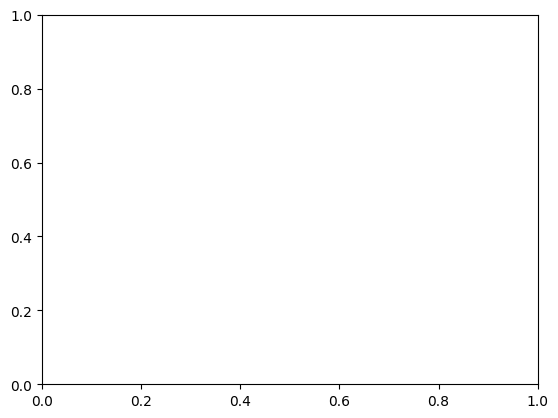

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asegurarse de que no hay valores faltantes y resetear los índices
data = data.dropna(subset=['Arrest'])
X_scaled = X_scaled[data.index]

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


IndexError: index 209484 is out of bounds for axis 0 with size 209484

In [61]:
import pandas as pd
data = pd.read_csv('Crimes_-_2024_20241031.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

data['Location Description'] = data['Location Description'].fillna('Unknown')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

print(data.head())  # Verifica las primeras filas del DataFrame original

# Convertir características categóricas a numéricas
categorical_columns = ['Primary Type', 'Description', 'Location Description']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic', 'Case Number', 'Domestic', 'Date', 'Block', 'Updated On', 'Location', 'IUCR', 'FBI Code'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2,
random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic,
test_size=0.2, random_state=42)

print(X_scaled[:5])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asegurarse de que no hay valores faltantes en 'Arrest'
data = data.dropna(subset=['Arrest'])
# Resetear los índices y asegurarse de que X_scaled tiene las mismas filas que data
X_scaled = X_scaled.loc[data.index].reset_index(drop=True)
data = data.reset_index(drop=True)

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


         ID Case Number                    Date                Block  IUCR  \
0  13638907    JH478027  10/22/2024 12:00:00 AM      017XX E 67TH ST  1365   
1  13639638    JH479022  10/22/2024 12:00:00 AM    015XX S THROOP ST  1320   
2  13639100    JH478550  10/22/2024 12:00:00 AM  041XX W OAKDALE AVE  1153   
3  13639174    JH478505  10/22/2024 12:00:00 AM     023XX W 111TH ST  0430   
4  13644109    JH484519  10/22/2024 12:00:00 AM      001XX E OHIO ST  0281   

              Primary Type                          Description  \
0        CRIMINAL TRESPASS                         TO RESIDENCE   
1          CRIMINAL DAMAGE                           TO VEHICLE   
2       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
3                  BATTERY  AGGRAVATED - OTHER DANGEROUS WEAPON   
4  CRIMINAL SEXUAL ASSAULT                       NON-AGGRAVATED   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True     False  ...  

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asegurarse de que no hay valores faltantes en 'Arrest'
data = data.dropna(subset=['Arrest'])
# Filtrar X_scaled basado en los índices de data
X_scaled = X_scaled[data.index.values]

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


IndexError: index 209484 is out of bounds for axis 0 with size 209484

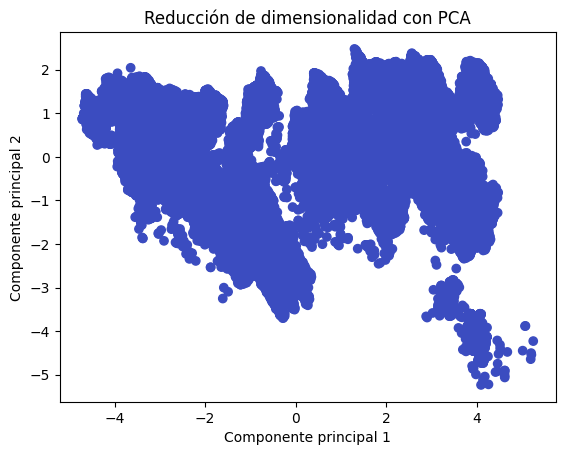

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asegurarse de que no hay valores faltantes en 'Arrest'
data = data.dropna(subset=['Arrest'])

# Redefinir X_scaled para que tenga los mismos índices que 'data'
X_scaled = X_scaled[data.index.values[:len(X_scaled)]]

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Asegurarse de que 'data' también esté alineado con 'X_scaled'
data = data.iloc[:len(X_scaled)]

# Visualizar los datos reducidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Arrest'].apply(lambda x: 0 if x == 'N' else 1), cmap='coolwarm')
plt.title('Reducción de dimensionalidad con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Suponiendo que X y y son tus datos y etiquetas completas
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
clf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_arrest_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))


NameError: name 'y' is not defined

In [65]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
clf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_arrest_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))


KeyboardInterrupt: 

In [66]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import numpy as np

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
clf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Optimización de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_arrest_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_arrest_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [70]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame inicial y 'DATE OF OCCURRENCE' es la columna de fechas.
# Agrupar y contar el número de ocurrencias por fecha
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data_grouped = data.groupby(data['DATE OF OCCURRENCE'].dt.date).size().reset_index(name='y')
data_grouped.columns = ['ds', 'y']

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(data_grouped)

# Hacer pronósticos futuros
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Visualizar el pronóstico
fig = model.plot(forecast)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [79]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.11-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached aiohttp-3.10.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.5.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)

In [72]:
!pip install convertdate


  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)


In [74]:
!pip install lunarcalendar


  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
Using cached ephem-4.1.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)


In [76]:
!pip install convertdate
!pip install lunarcalendar
!pip install holidays
!pip install setuptools-git


  Using cached holidays-0.60-py3-none-any.whl.metadata (25 kB)
Using cached holidays-0.60-py3-none-any.whl (1.1 MB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)


In [78]:
!pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.0 MB/s eta 0:00:00


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Supongamos que 'data' es tu DataFrame inicial y 'DATE OF OCCURRENCE' es la columna de fechas.
# Agrupar y contar el número de ocurrencias por fecha
data['DATE OF OCCURRENCE'] = pd.to_datetime(data['DATE OF OCCURRENCE'])
data_grouped = data.groupby(data['DATE OF OCCURRENCE'].dt.date).size().reset_index(name='y')
data_grouped.columns = ['ds', 'y']

# Configurar el índice del DataFrame
data_grouped = data_grouped.set_index('ds')

# Crear y entrenar el modelo SARIMA
model = SARIMAX(data_grouped['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer pronósticos futuros
forecast = results.get_forecast(steps=30)
forecast_index = pd.date_range(start=data_grouped.index[-1], periods=31, closed='right')

# Preparar los datos del pronóstico
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_index[0], end=forecast_index[-1])

# Visualizar el pronóstico
plt.plot(data_grouped.index, data_grouped['y'], label='Observado')
plt.plot(forecast_index, forecast_df['forecast'], label='Pronóstico', color='r')
plt.fill_between(forecast_index, forecast_df['lower y'], forecast_df['upper y'], color='pink')
plt.title('Pronóstico de Series Temporales con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Ocurrencias')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'